In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-depression-dataset/Student Depression Dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/student-depression-dataset/Student Depression Dataset.csv')

In [4]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
import seaborn as sns

In [6]:
df.Degree.value_counts()

Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
MBBS         696
BBA          696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Academic Pressure', ylabel='Count'>

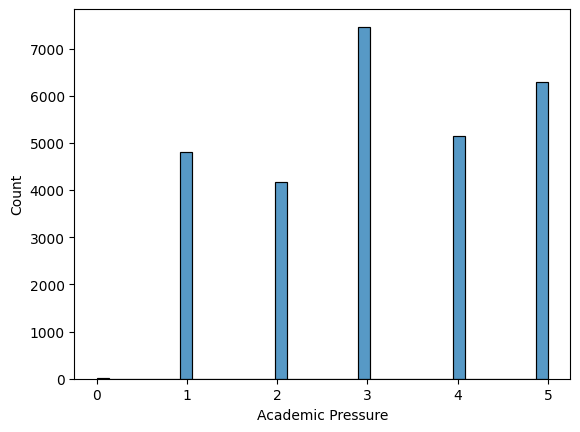

In [7]:
sns.histplot(data=df, x='Academic Pressure')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Work/Study Hours', ylabel='Count'>

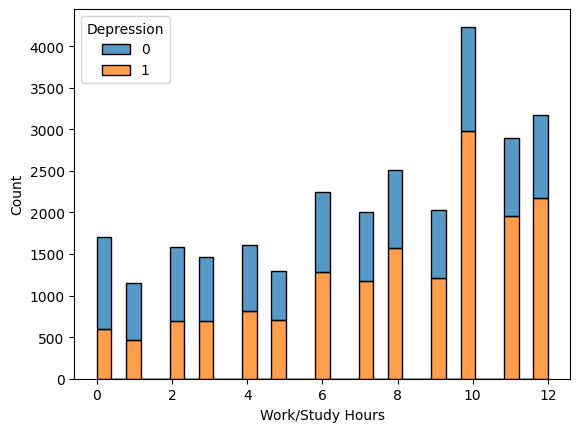

In [8]:
sns.histplot(data=df, x='Work/Study Hours', hue='Depression', multiple='stack')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Academic Pressure', ylabel='Count'>

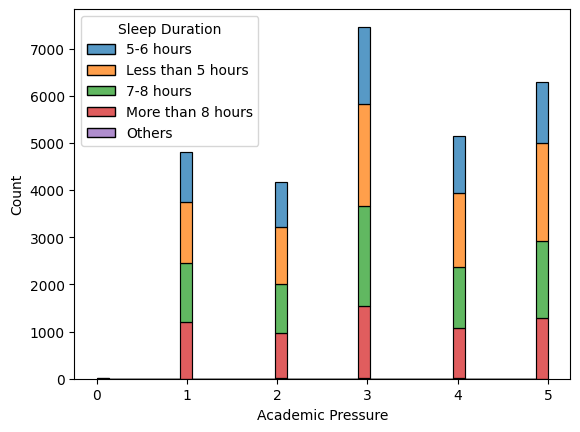

In [9]:
sns.histplot(data=df, x='Academic Pressure', hue='Sleep Duration', multiple='stack')

In [10]:
for i in range(6):
    print('If the value Academic Pressure is', i)
    print(df.loc[df['Academic Pressure']==i, ['Study Satisfaction']].value_counts(), '\n')

If the value Academic Pressure is 0
Study Satisfaction
0.0                   7
2.0                   1
3.0                   1
Name: count, dtype: int64 

If the value Academic Pressure is 1
Study Satisfaction
3.0                   1141
4.0                   1099
1.0                    898
2.0                    868
5.0                    795
Name: count, dtype: int64 

If the value Academic Pressure is 2
Study Satisfaction
4.0                   1092
3.0                    950
5.0                    944
2.0                    638
1.0                    554
Name: count, dtype: int64 

If the value Academic Pressure is 3
Study Satisfaction
4.0                   1990
2.0                   1523
3.0                   1487
1.0                   1340
5.0                   1122
Name: count, dtype: int64 

If the value Academic Pressure is 4
Study Satisfaction
2.0                   1217
3.0                   1141
4.0                   1052
1.0                   1041
5.0                    703
0

<Axes: xlabel='Study Satisfaction', ylabel='Academic Pressure'>

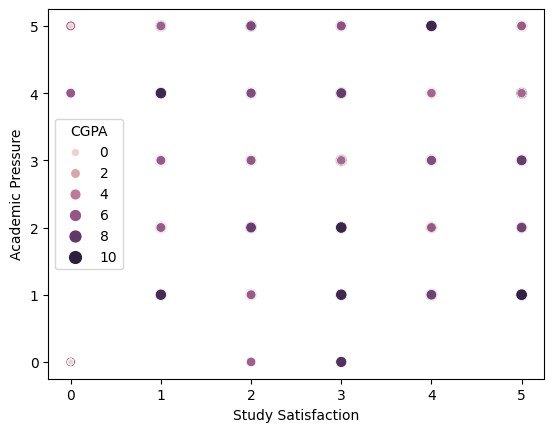

In [23]:
sns.scatterplot(data=df, x='Study Satisfaction', y='Academic Pressure', hue='CGPA', size='CGPA')

<Axes: xlabel='Study Satisfaction', ylabel='Academic Pressure'>

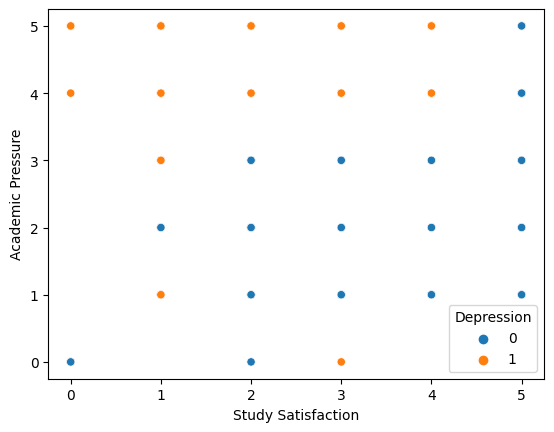

In [25]:
sns.scatterplot(data=df, x='Study Satisfaction', y='Academic Pressure', hue='Depression')

In [24]:
df.groupby('Academic Pressure')['Sleep Duration'].count()

Academic Pressure
0.0       9
1.0    4801
2.0    4178
3.0    7462
4.0    5155
5.0    6296
Name: Sleep Duration, dtype: int64

In [26]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [32]:
obj_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='float').columns

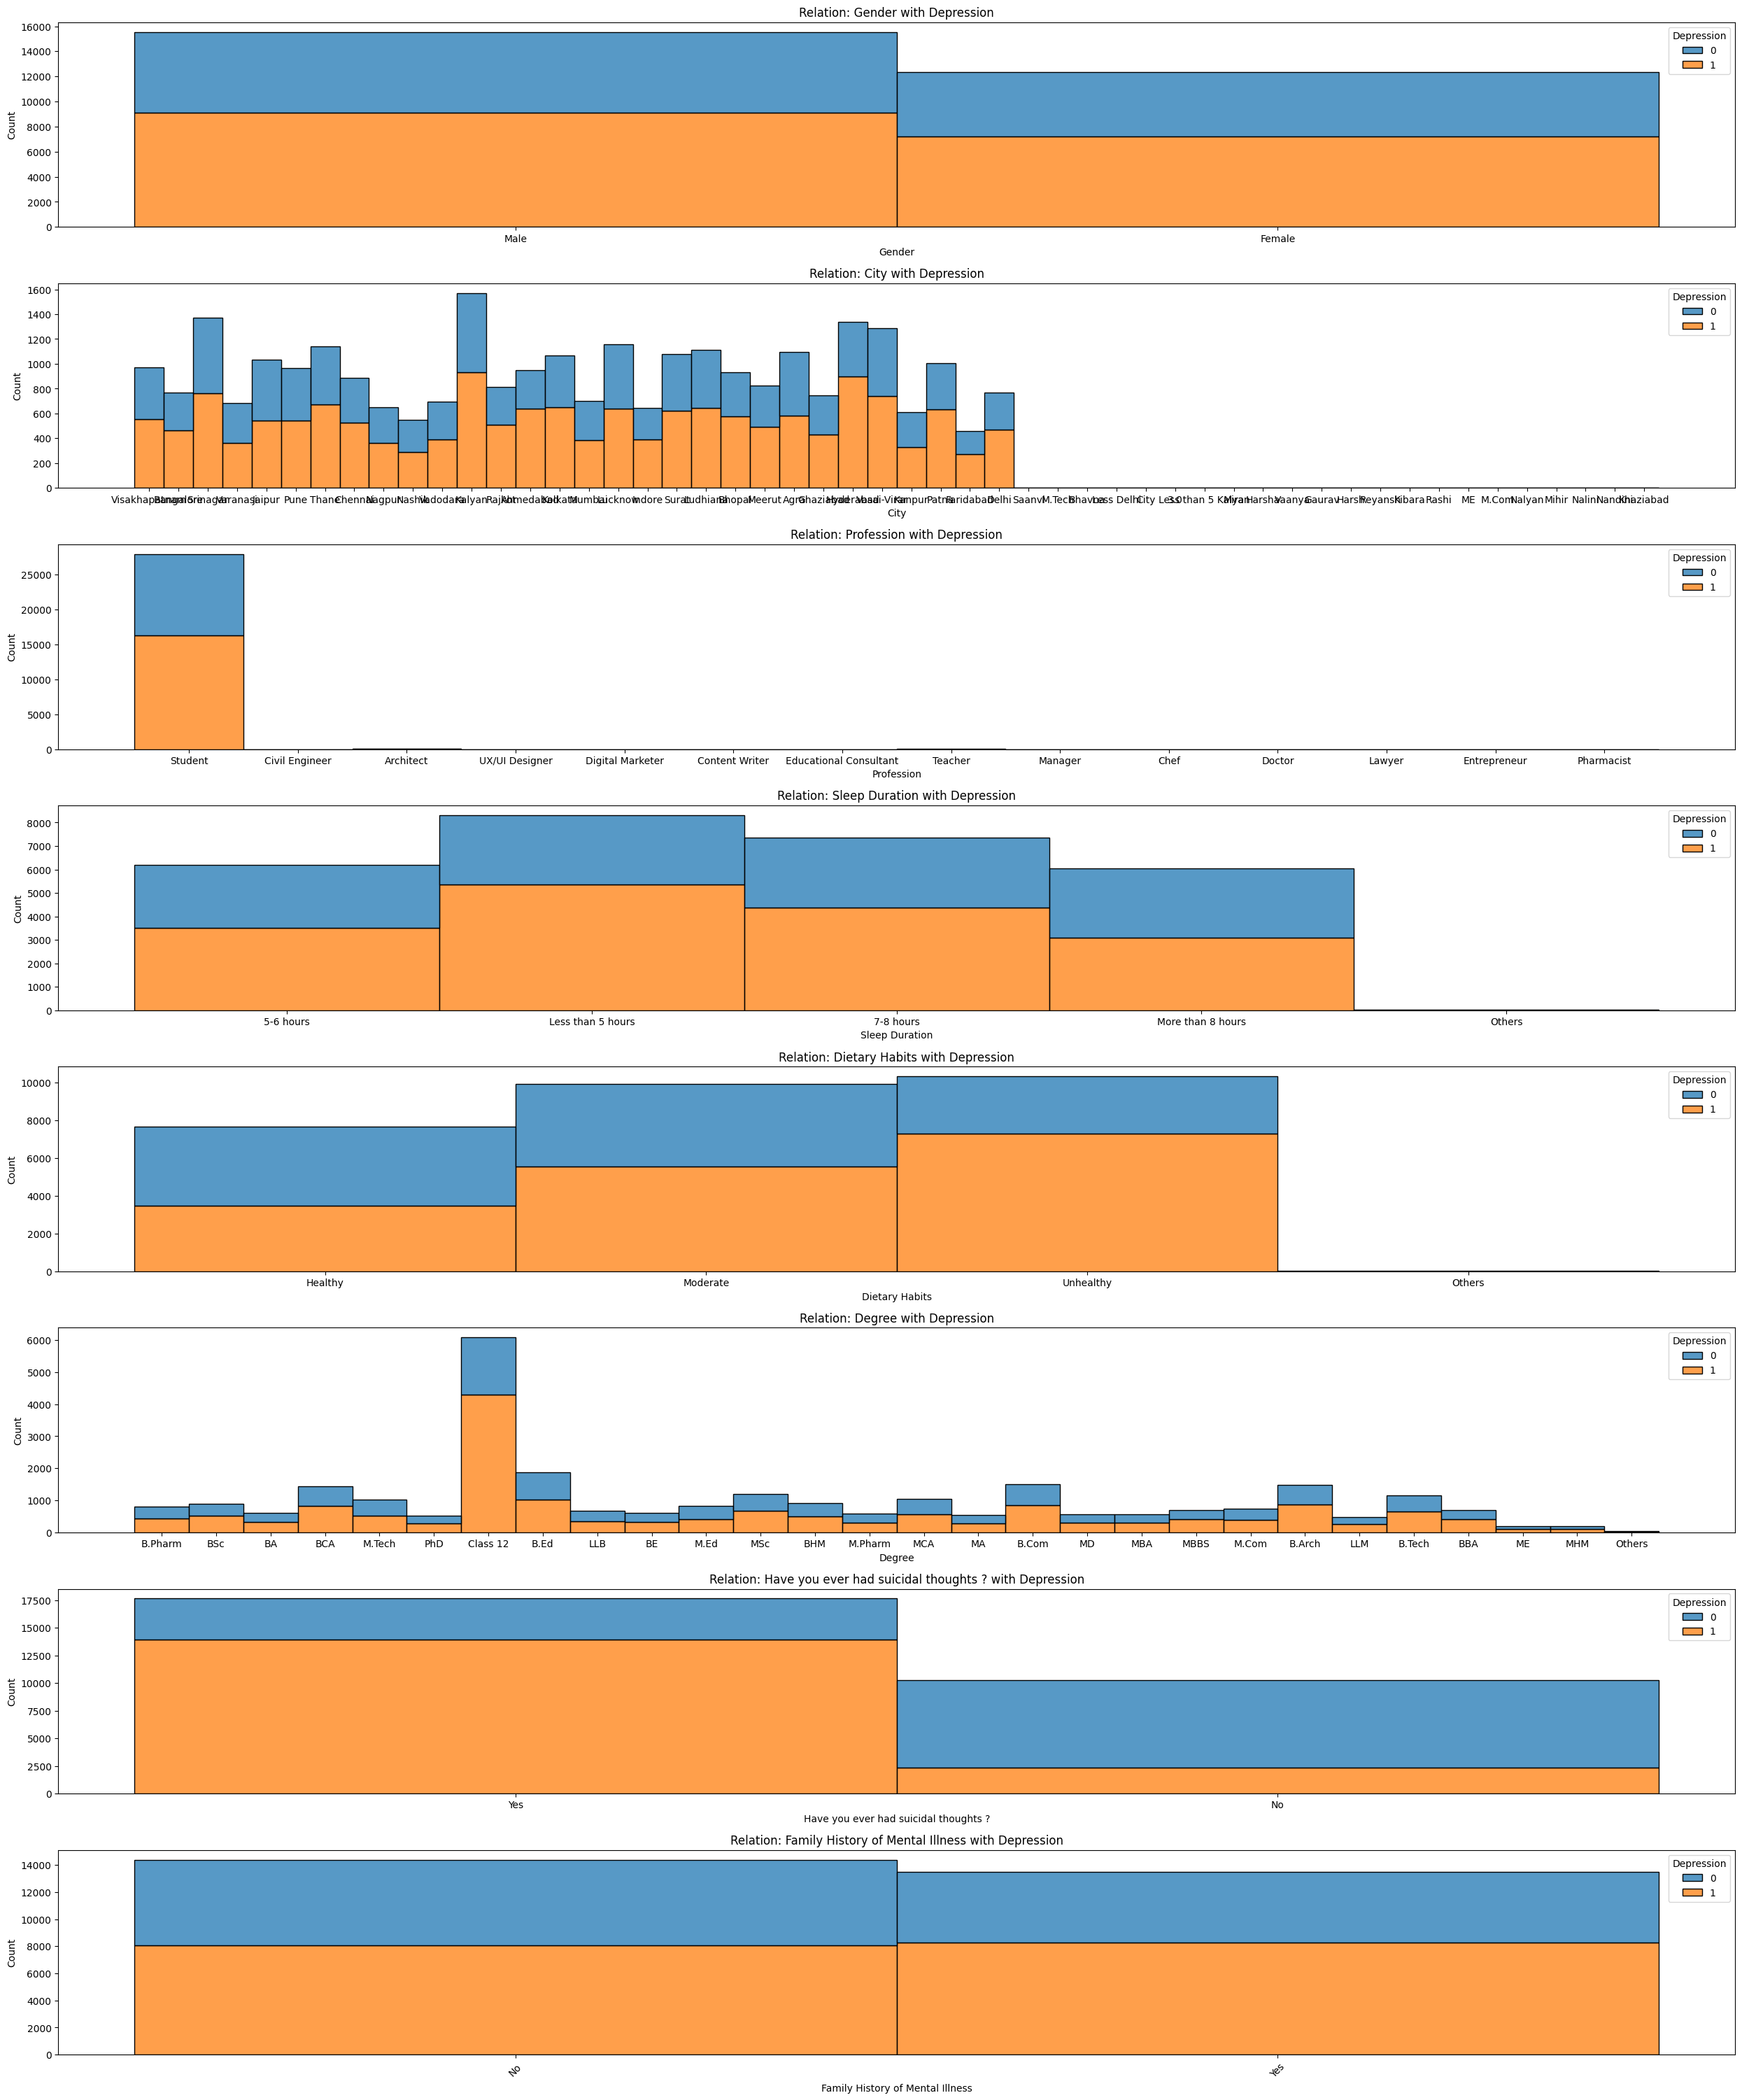

In [62]:
# Assuming df is your DataFrame and obj_cols is your list of object columns
n = len(obj_cols)
fig, axs = plt.subplots(n, 1, figsize=(25, 30))

# Initialize a counter for the subplot index
subplot_index = 0

for i in range(n):
    if obj_cols[i] == 'Depression':
        continue
    
    # Use the current subplot index
    sns.histplot(data=df, x=obj_cols[i], hue='Depression', multiple='stack', ax=axs[subplot_index])
    axs[subplot_index].set_title(f'Relation: {obj_cols[i]} with Depression')
    
    # Increment the subplot index
    subplot_index += 1

# Adjust layout
plt.tight_layout()

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Show the plot
plt.show()

<Axes: >

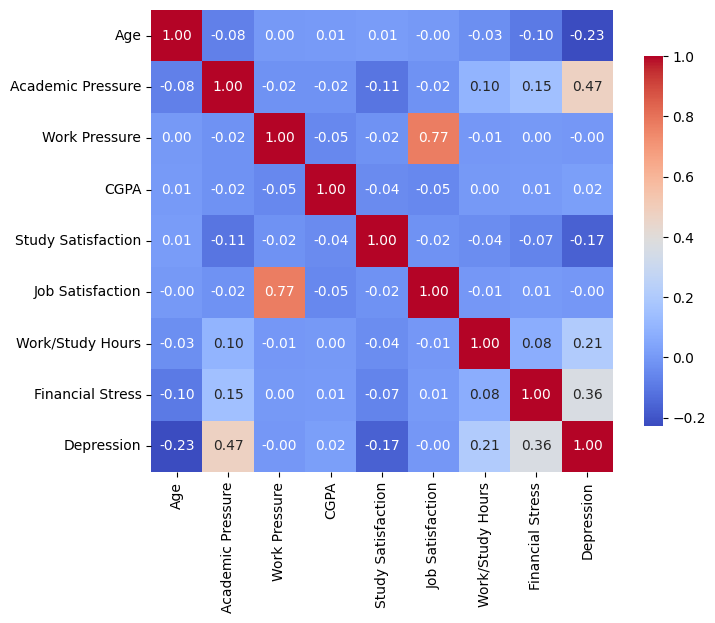

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[list(num_cols)+['Depression']].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})